In [115]:
# Load the required packages
# import pandas as pd
import numpy as np
import SpringRank as sr
# from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
def compute_gamma(A, beta):
    
    # ignore some warning messages surfaced by SpringRank
    np.seterr(divide='ignore', invalid='ignore') 
    
    # compute springranks
    phi = sr.get_ranks(A)
    
    # exponentiate
    gamma = np.exp(beta * phi)
    
    # normalize
    gamma = gamma / gamma.sum()
    
    return(gamma)    

In [117]:

# construct the initial condition and container for trajectories
def initialize(n, n_rounds = 1, A0 = None):
    if A0 is None:
        A = np.ones((n, n)).astype(int)
    else:
        A = A0
    GAMMA = np.zeros((n_rounds, n))
    
    return(A, GAMMA)
    
# construct the increment to add to the current state. Either stochastic or deterministic. 
def increment(n, gamma, method = 'stochastic'):
    
    if method == 'stochastic':
        j = np.random.randint(n)           # uniformly random department gets to hire
        i = np.random.choice(n, p = gamma) # chooses from departments proportional to $\gamma$. 
        E = np.zeros((n,n))
        E[i,j] = 1
        return(E)
    
    elif method == 'deterministic': 
        G = np.tile(gamma, (n,1)).T        # G is the expectation of E above 
        return(G)
    
def simulate(n, beta, lam, n_rounds, method = 'stochastic', update_interval = 1, A0 = None, ranked = False):
    A, GAMMA = initialize(n, n_rounds, A0)
    
    for r in range(n_rounds):          
        if r % update_interval == 0:                    # update the springranks at this interval
            gamma = compute_gamma(A, beta)
        if ranked:     
            GAMMA[r,:] = gamma[np.argsort(gamma)]                              # record current gamma, SORTED
        else:
            GAMMA[r,:] = gamma
        A = lam*A + (1-lam)*increment(n, gamma, method) # update A
        
    return(GAMMA)

def rank_experiment(**kwargs):
    GAMMA = simulate(**kwargs)
    rank_means = GAMMA[np.int(GAMMA.shape[0]/2):,].mean(axis = 0)
    return(rank_means)

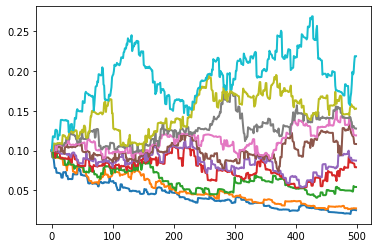

In [118]:
n = 10

A0 = np.ones((n,n))
# A0 = np.random.randint(low = 1, high = 10, size = (n,n))
A0 = A0 / A0.sum()
# A0 = A0.astype(int)

n_rounds = 500

GAMMA = simulate(n = n, 
                 beta = 1.9, 
                 lam = .99, 
                 n_rounds = n_rounds, 
                 method = 'stochastic', 
                 update_interval = 1,
                 A0 = A0, 
                 ranked = True)

for i in range(n):
    plt.plot(GAMMA[:,i], linewidth = 2)

In [182]:
BETAS = np.linspace(1, 3, 21)

n = 3

n_rounds = 10000

n_epochs = 5

R = np.zeros((n_epochs, len(BETAS), n))

for j in range(n_epochs):
    for i in range(len(BETAS)):
        R[j,i] = rank_experiment(n = n, 
                         beta = BETAS[i], 
                         lam = .999, 
                         n_rounds = n_rounds, 
                         method = 'stochastic', 
                         update_interval = 10,
    #                      A0 = A0, 
                         ranked = True)

In [183]:
R_ = R.mean(axis = 0)

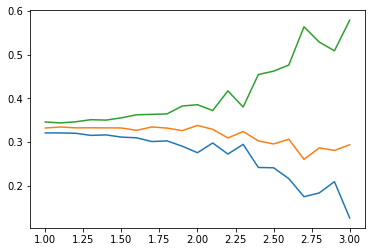

In [184]:
for i in range(n):
#     for jin range(n):
    plt.plot(BETAS, R_[:,i])

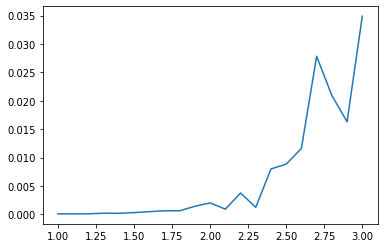

In [187]:
plt.plot(BETAS, np.var(R_, axis = 1))

In [186]:
np.log(1/2)/np.log(.99)

68.96756393652842